<a href="https://colab.research.google.com/github/alvlagus/Neural_Network_GB/blob/Lesson_7/Hw_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'><b>Введение в нейронные сети<b></h1>

<h2 align='center'>Урок 7. Детектирование объектов</h2>

<h3 align='left'>Практическое задание:</h3>  

Сделайте краткий обзор какой-нибудь научной работы посвященной тому или иному алгоритму для object detection, который не рассматривался на уроке.  

# Retina Net

**RetinaNet**  — одноэтапная якорная нейронная
сеть для детекции объектов. Детекция включает в себя
две задачи: локализацию — определение координат,
ограничивающих объекты прямоугольников, и классификацию объектов интереса. <br>

## Архитектура нейронной сети RetinaNet

Архитектура свёрточной нейронной сети (СНС) RetinaNet состоит из 4 основных частей, каждая из которых имеет своё назначение:  
a) Backbone – основная (базовая) сеть, служащая для извлечения признаков из поступающего на вход изображения. Данная часть сети является вариативной и в её основу могут входить классификационные нейросети, такие как ResNet, VGG, EfficientNet и другие;<br>
b) Feature Pyramid Net (FPN) – свёрточная нейронная сеть, построенная в виде пирамиды, служащая для объединения достоинств карт признаков нижних и верхних уровней сети, первые имеют высокое разрешение, но низкую семантическую, обобщающую способность; вторые — наоборот; <br> 
c) Classification Subnet – подсеть, извлекающая из FPN информацию о классах объектов, решая задачу классификации;<br>
d) Regression Subnet – подсеть, извлекающая из FPN информацию о координатах объектов на изображении, решая задачу регрессии.<br>
На рис. 1 изображена архитектура RetinaNet c ResNet нейросетью в качестве backbone.<br>

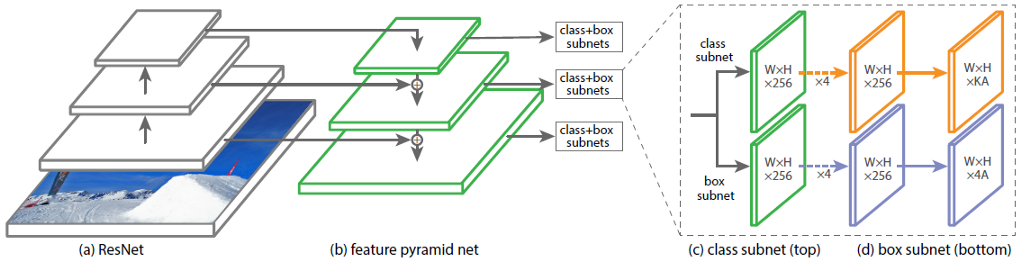

*Рисунок 1 – Архитектура RetinaNet с backbone-сетью ResNet*

Разберём подробно каждую из частей RetinaNet, представленных на рис. 1.

**Backbone часть сети RetinaNet**

Учитывая, что часть архитектуры RetinaNet, которая принимает на вход изображение и выделяет важные признаки, является вариативной и извлеченная из этой части информация будет обрабатываться на следующих этапах, то важно выбрать подходящую backbone-сеть для лучших результатов.

Недавние исследования по оптимизации СНС позволили разработать классификационные модели, которые опередили все ранее разработанные архитектуры с лучшими показателями точности на датасете ImageNet при улучшении эффективности в 10 раз. Данные сети получили название EfficientNet-B(0-7). Показатели семейства новых сетей представлены на рис. 2.

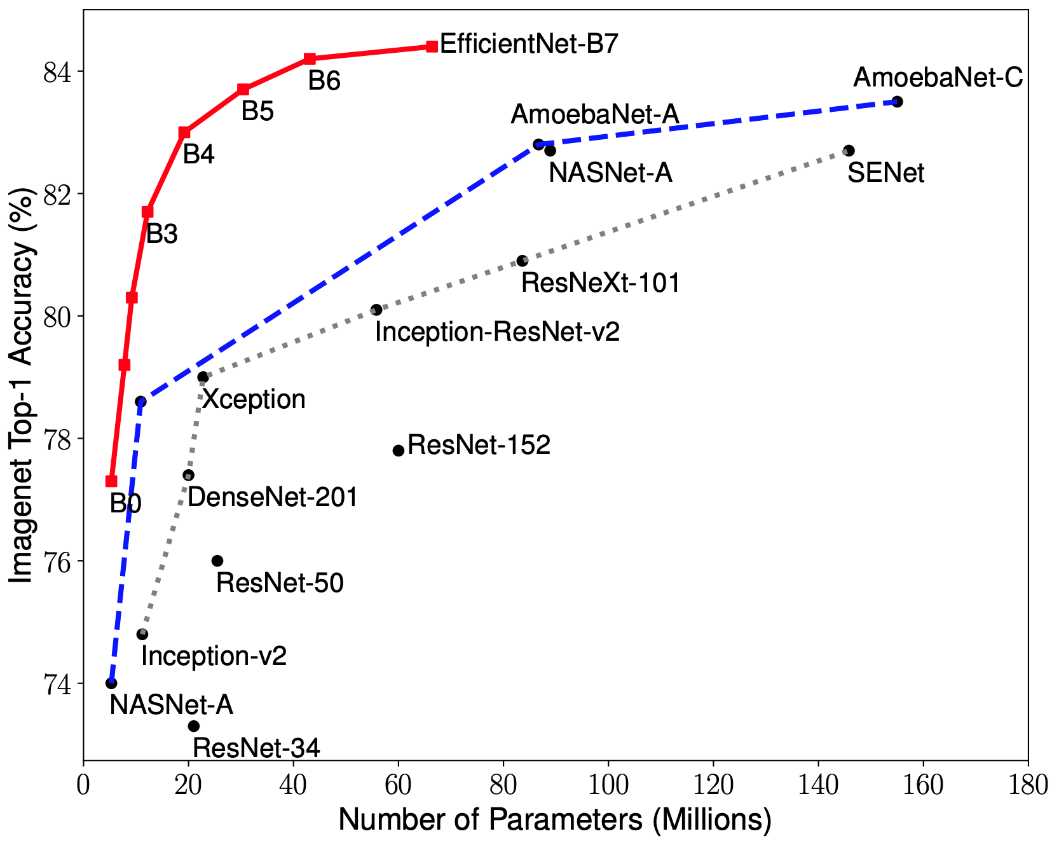

*Рисунок 2 – График зависимости наибольшего показателя точности от количества весов сети для различных архитектур*



**Пирамида признаков**

Feature Pyramid Network состоит из трёх основных частей: восходящий путь (bottom-up pathway), нисходящий путь (top-down pathway) и боковые соединения (lateral connections).
Восходящий путь представляет собой некую иерархическую «пирамиду» – последовательность свёрточных слоёв с уменьшающейся размерностью, в нашем случае – backbone сеть. Верхние слои сверточной сети имеют большее семантическое значение, но меньшее разрешение, а нижние наоборот (рис. 3). Bottom-up pathway имеет уязвимость при извлечении признаков – потеря важной информации об объекте, например из-за зашумления небольшого, но значимого, объекта фоном, так как к концу сети информация сильно сжата и обобщена.
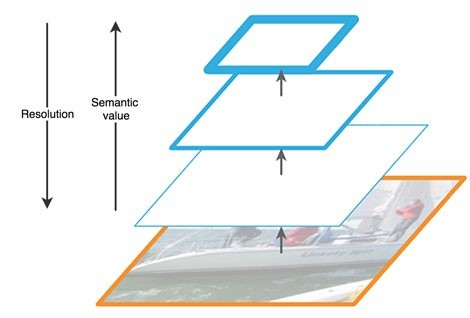<br>

*Рисунок 3 – Особенности карт признаков на разных уровнях нейросети*

Нисходящий путь также представляет собой «пирамиду». Карты признаков верхнего слоя этой пирамиды имеют размер карт признаков верхнего слоя bottom-up пирамиды и увеличиваются вдвое методом ближайшего соседа (рис. 4) по направлению вниз.<br>
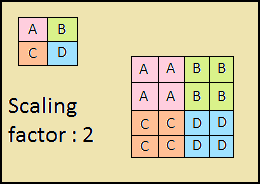<br>
*Рисунок 4 – Увеличение разрешения изображения методом ближайшего соседа*

Таким образом в top-down сети каждая карта признаков вышележащего слоя увеличивается до размеров карты нижележащего. Помимо этого, в FPN присутствуют боковые соединения, это означает, что карты признаков соответствующих слоёв bottom-up и top-down пирамид поэлементно складываются, причём карты из bottom-up проходят свёртку 1*1. Этот процесс схематично представлен на рис. 5.<br>

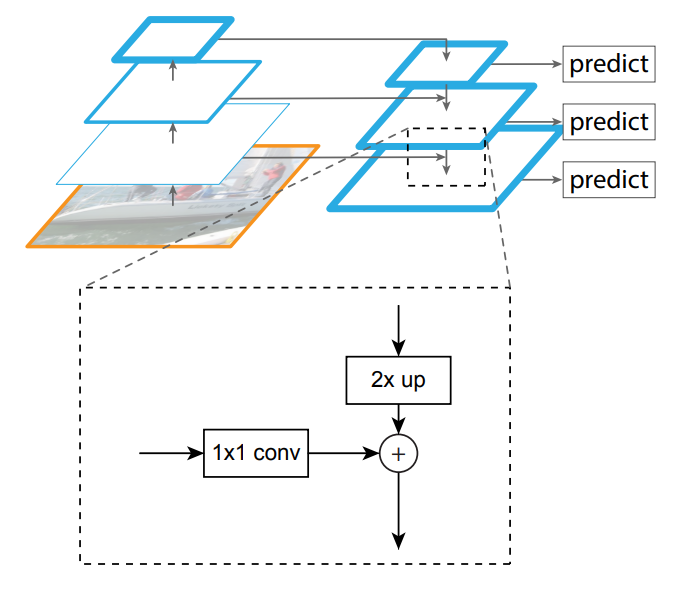<br>
*Рисунок 5 – Устройство пирамиды признаков*

Боковые соединения решают проблему затухания важных сигналов в процессе прохода по слоям, совмещая семантически важную информацию, полученную к концу первой пирамиды и более детальную информацию, полученную в ней ранее.

Далее, каждый из полученных слоёв в top-down пирамиде обрабатывается двумя подсетями.

**Подсети классификации и регреcсии**

Третей частью архитектуры RetinaNet являются две подсети: классификационная и регрессионная (рис. 1). Каждая из этих подсетей образует на выходе ответ о классе объекта и его расположении на изображении. Рассмотрим принцип работы каждой из них.<br>
Разница в принципах работы рассматриваемых блоков (подсетей) не отличается до последнего слоя. Каждый из них состоит из 4 слоёв свёрточных сетей. В слое формируются 256 карт признаков. На пятом слое количество карт признаков изменяется: регрессионная подсеть имеет 4*A карт признаков, классификационная – K*A карт признаков, где A – количество якорных рамок (подробное описание якорных рамок в следующем подразделе), K – количество классов объектов.<br>
  В последнем, шестом, слое каждая карта признаков преобразуется в набор векторов. Регрессионная модель на выходе имеет для каждой якорной рамки вектор из 4 значений, указывающих смещение целевой рамки (англ. ground-truth box) относительно якорной. Классификационная модель имеет на выходе для каждой якорной рамки one-hot вектор длиной K, в котором индекс со значением 1 соответствует номеру класса, который нейросеть присвоила объекту.

**Якорные рамки**

В прошлом разделе был использован термин якорных рамок. Якорная рамка (англ. anchor box) – гиперпараметр нейросетей-детекторов, заранее определенный ограничивающий прямоугольник, относительно которого работает сеть.<br>
Допустим, сеть имеет на выходе карту признаков размером 3*3. В RetinaNet каждая из ячеек имеет 9 якорных рамок, каждая из которых имеет разный размер и соотношение сторон (рис. 7). Во время обучения каждой целевой рамке подбираются в соответствие якорные рамки. Если их показатель IoU имеет значение от 0.5, то якорная рамка назначается целевой, если значение меньше 0.4, то она считается фоном, в других случаях якорная рамка будет проигнорирована для обучения. Классификационная сеть обучается относительно выполненного назначения (класс объекта или фон), регрессионная сеть обучается относительно координат якорной рамки (важно отметить, что ошибка вычисляется относительно якорной, но не целевой рамки).<br>
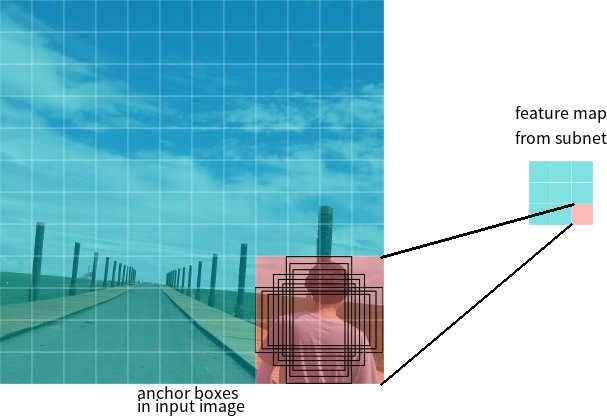  
*Рисунок 7 – Якорные рамки для одной ячейки карты признаков с размером 3*3*<br>

**Функции потерь**

Потери RetinaNet являются составными, их составляют два значения: ошибка регрессии, или локализации (ниже обозначено как Lloc), и ошибка классификации (ниже обозначено как Lcls). Общая функция потерь может быть записана как:<br>

$L=\lambda Lloc+Lcls\mathrm{\ \ \ \ \ \ }$<br>


Где λ является гиперпараметром, который контролирует баланс между двумя потерями.<br>

Рассмотрим подробнее вычисление каждой из потерь.
Как было описано ранее, каждой целевой рамке назначается якорная. Обозначим эти пары как (Ai,Gi)i=1,...N, где А представляет якорь, G – целевую рамку, а N количество сопоставленных пар.<br>

Для каждого якоря регрессионная сеть предсказывает 4 числа, которые можно обозначить как Pi=(Pix,Piy,Piw,Pih). Первые две пары означают предсказанную разницу между координатами центров якорной Ai и целевой рамки Gi, а последние две – предсказанную разницу между их шириной и высотой. Соответственно, для каждой целевой рамки вычисляется Ti, как разница между якорной и целевой рамкой:<br>

$Lloc=\sum j\in\left\{x,y,w,h\right\}smoothL\mathrm{1}\left(Pij-Tij\right)\mathrm{\ }$<br>

Где smoothL1(х) определяется формулой ниже:<br>

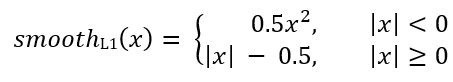

Потери задачи классификации в сети RetinaNet вычисляются с помощью функции Focal loss.<br>
$Lcls=-i=1Kαiyilog(pi)(1-pi)\gamma$<br>



где К – количество классов, уi – целевое значение класса, р – вероятность предсказания i-го класса, γ – параметр фокуса, α – коэффициент смещения. Данная функция является усовершенствованной функцией кросс-энтропии. Отличие заключается в добавлении параметра γ∈(0,+∞), который решает проблему несбалансированности классов. Во время обучения, большая часть объектов, обрабатываемых классификатором, является фоном, который является отдельным классом. Поэтому может возникнуть проблема, когда нейросеть обучится определять фон лучше, чем другие объекты. Добавление нового параметра решило данную проблему, уменьшив значение ошибки для легко классифицируемых объектов. Графики функций focal и cross entropy представлены на рис.8.<br>
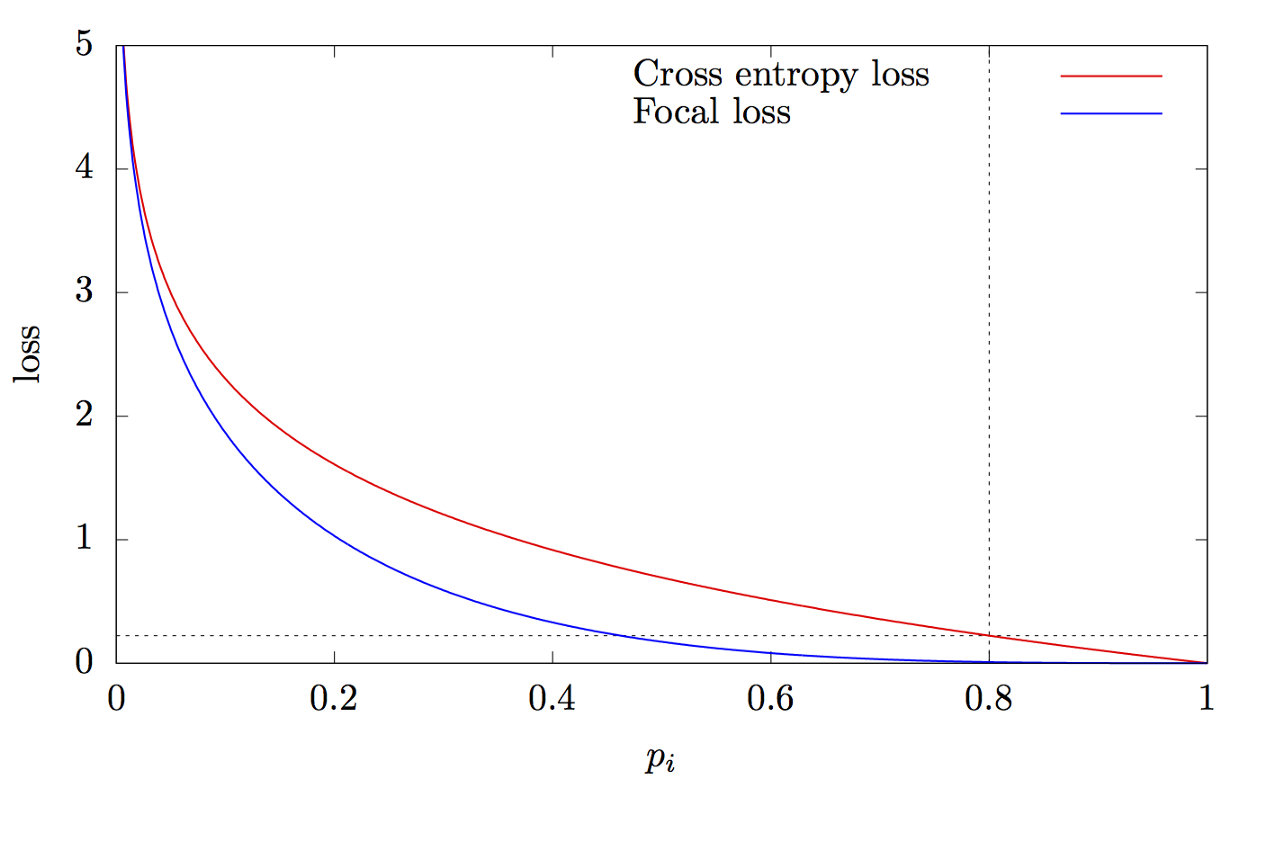
*Рисунок 8 – Графики focal и cross entropy функций*<br>

RetinaNet больше о предложении новой функции потерь для устранения дисбаланса классов, а не публикации новой сети. Давайте вернем дисбаланс в класс. Одноступенчатые детекторы, такие как SSD и YOLO, по-видимому, быстрее, но все еще отстают в точности по сравнению с двухступенчатыми детекторами. И проблема дисбаланса классов является одной из причин этого недостатка.  
Поэтому авторы предложили новую функцию потерь под названиемочаговая потеряпридавая вес на простые примеры. Математическое выражение, как показано выше. Это кросс-энтропийная потеря, умноженная на модулирующий коэффициент. Модулирующий фактор уменьшает влияние простых примеров на потери.  
Например, сравните потерю, когдаPₜ= 0,9 иγ= 2. Если мы говорим о потере кросс-энтропии как CE, то потеря фокуса становится -0.01CE. Потеря становится в 100 раз ниже. И еслиPₜстановится больше, скажем, 0,968, с постояннымγфокальная потеря становится -0,001CE (как (1–0,968) ² = (0,032) ≈ ≈ 0,001). Таким образом, это приводит к тому, что простые примеры становятся еще сложнее, а взамен корректируется дисбаланс. И когдаγувеличивается, как вы можете видеть на графике справа, потеря становится меньше, когда вес увеличиваетсяPₜпостоянно.   
RetinaNet превзошла на наборе данных СОСО все предыдущие сети по точности и скорости. RetinaNet-101–500 указывает сеть с ResNet-101 и масштабом изображения 500 пикселей. Использование больших масштабов дает более высокую точность, чем все двухэтапные заходы на посадку, и при этом достаточно быстрый.

Несмотря на то, что функции потерь RetinaNet признаны передовыми для детекции, они не позволяют моделировать гомоскедастичную алеаторную неопределенность, что делает нейросеть чувствительной к шуму в данных.

**Использованные источники:**

1.   https://arxiv.org/abs/1708.02002
2.   https://habr.com/ru/post/510560/
3.   https://youtu.be/infFuZ0BwFQ
4.   https://machinelearningmastery.ru/deep-dive-into-the-computer-vision-world-part-3-abd7fd2c64ef/


